# A model of a neuron - perceptron

$$ y = \sigma(wx+b) $$



In [4]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

# Solving NAND
A NAND gate is a fundamental logic gate in computing. 

![NAND Gate](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Faccendoreliability.com%2Fwp-content%2Fuploads%2F2017%2F07%2FLogic-gate-nand-us.png&f=1&nofb=1)

They have the following properties, given inputs A, B they output Y. 

|A|B|Y|
|-|-|-|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

It turns out that if you have enough NAND gates you could build a whole computer, from the ALU (Arithmetic and Logic Unit) to the storage (Flip Flops), so if we can make a binary classifier that replicates a NAND, we know we have found a good building block.

In [5]:
def hidden_XY(x,y,w,b):
    out = w*x + w*y + b
    return out

def perceptron(x,y,w,b):
    o = hidden_XY(x,y,w,b)
    if (o > 0):
        return 1
    else:
        return 0

<IPython.core.display.Javascript object>


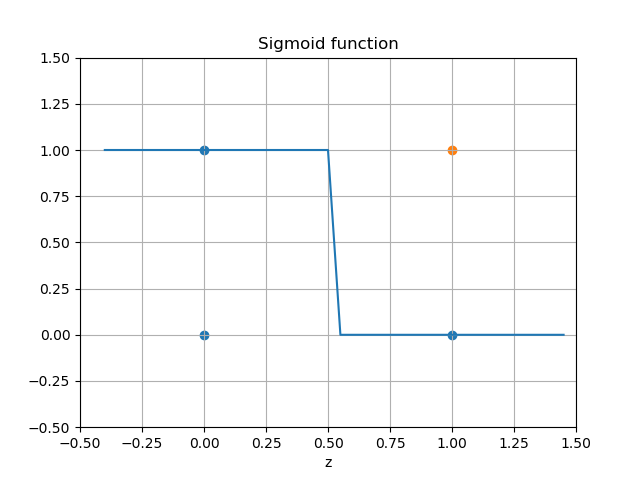

interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

In [7]:
# Plotting the output of a hidden neuron 
x = np.arange(-0.4, 1.5, .05)
y = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(perceptron)
sigma = sigma_fn(x,y,1,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Our inputs we want to give 1 (blue)
positive = np.array([
    [0,0],
    [0,1],
    [1,0],
])
a, b = positive.T
plt.scatter(a,b)

# Our inputs which we want to give 0 (red)
negative = np.array([
    [1,1],
])
a, b= negative.T
plt.scatter(a,b)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Sigmoid function')

def update(w = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(x,y,w,b))
    fig.canvas.draw_idle()

slow = interactive(update,w=FloatSlider(min=-3, max=3, step=0.1), b =FloatSlider(min=-3, max=3, step=0.1));
fig.show()
slow

In [8]:
w = -2
b = 3
print("A,B,Y")
print(0,0,perceptron(0,0,w,b))
print(0,1,perceptron(0,1,w,b))
print(1,0,perceptron(1,0,w,b))
print(1,1,perceptron(1,1,w,b))

A,B,Y
0 0 1
0 1 1
1 0 1
1 1 0


Note that if the line is touching the point, we classify that as a 1. 

# We have solved NAND!

NAND is just one type of logic gate, it turns out there are many. 
XOR is another type of gate that has these properties:

|A|B|Y|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

# Can we solve XOR?

<IPython.core.display.Javascript object>


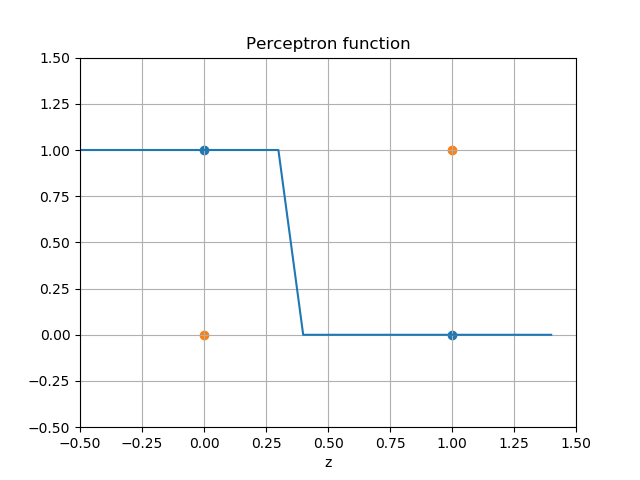

interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

In [9]:
# Plotting the output of a hidden neuron 
x = np.arange(-0.5, 1.5, .1)
y = np.arange(-0.5, 1.5, .1)
sigma_fn = np.vectorize(perceptron)
sigma = sigma_fn(x,y,1,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Our inputs we want to give 1 (blue)
positive = np.array([
    [0,1],
    [1,0],
])
a, b = positive.T
plt.scatter(a,b)

# Our inputs which we want to give 0 (red)
negative = np.array([
    [0,0],
    [1,1]
])
a, b= negative.T
plt.scatter(a,b)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Perceptron function')

def update(w = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(x,y,w,b))
    fig.canvas.draw_idle()

slow = interactive(update,w=FloatSlider(min=-3, max=3, step=0.1), b =FloatSlider(min=-3, max=3, step=0.1));
fig.show()
slow

In [10]:
w = -1.2
b = 1
print("A,B,Y")
print(0,0,perceptron(0,0,w,b))
print(0,1,perceptron(0,1,w,b))
print(1,0,perceptron(1,0,w,b))
print(1,1,perceptron(1,1,w,b))

A,B,Y
0 0 1
0 1 0
1 0 0
1 1 0


A single perceptron cannot learn to classify XOR. 



# Introducing the sigmoid activation function:
A hidden neuron's output can be produced by:
$$ y = \sigma(wx+b) $$
Where:
$$ \sigma(z) =\frac{1}{1+e^{-z}}  $$


In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def hidden_n(x,w,b):
    y = w*x+b
    return sigmoid(y)

hidden_n(1,1,1)

0.8807970779778823

<IPython.core.display.Javascript object>


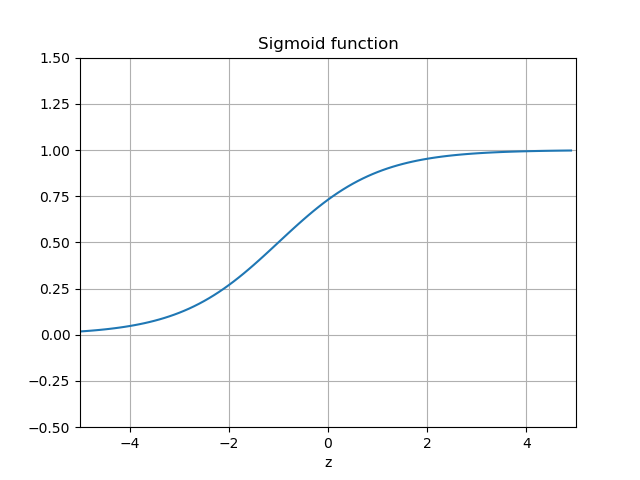

In [13]:
# Plotting the output of a hidden neuron 
z = np.arange(-5, 5, .1)
sigma_fn = np.vectorize(hidden_n)
sigma = sigma_fn(z,1,1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, sigma)
ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Sigmoid function')

plt.show()

<IPython.core.display.Javascript object>


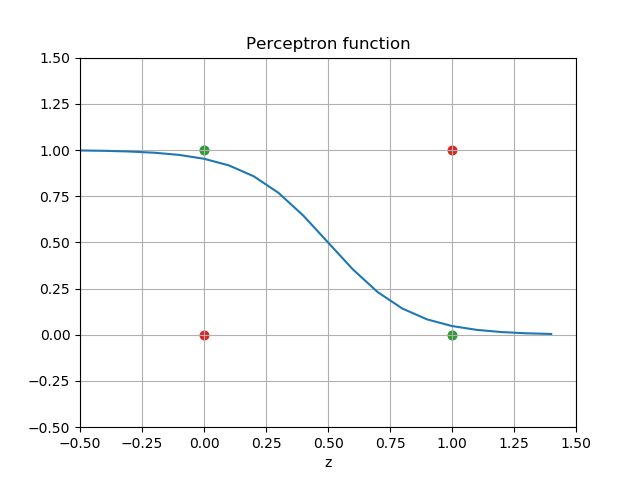

interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

In [18]:
def sigmoid_perceptron(x,y,w,b):
    y = w*x + w*y +b
    return sigmoid(y)

# Plotting the output of a hidden neuron 
x = np.arange(-0.5, 1.5, .1)
y = np.arange(-0.5, 1.5, .1)
sigma_fn = np.vectorize(sigmoid_perceptron)
sigma = sigma_fn(x,y,1,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Plotting XOR
# Our inputs we want to give 1 (blue)
positive = np.array([
    [0,1],
    [1,0],
])
a, b = positive.T
plt.scatter(a,b)

# Our inputs which we want to give 0 (red)
negative = np.array([
    [0,0],
    [1,1]
])
a, b= negative.T
plt.scatter(a,b)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Perceptron function')

def update(w = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(x,y,w,b))
    fig.canvas.draw_idle()

slow = interactive(update,w=FloatSlider(min=-3, max=3, step=0.1), b =FloatSlider(min=-3, max=3, step=0.1));
fig.show()
slow

<IPython.core.display.Javascript object>


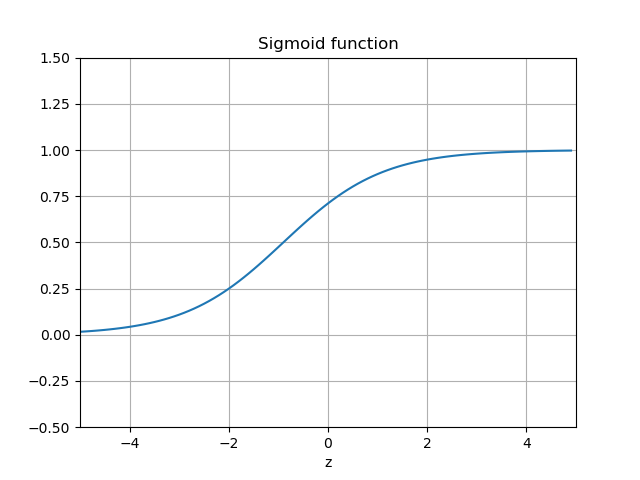

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), FloatSlider(value=1.0, descr…

In [37]:
%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
import numpy as np

# Plotting the output of a hidden neuron 
z = np.arange(-5, 5, .1)
sigma_fn = np.vectorize(hidden_n)
sigma = sigma_fn(z,1,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(z, sigma)
ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Sigmoid function')

def update(w = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(z,w,b))
    fig.canvas.draw_idle()

interact(update);
fig.show()

## With a very high weight we get a step function. 

<IPython.core.display.Javascript object>


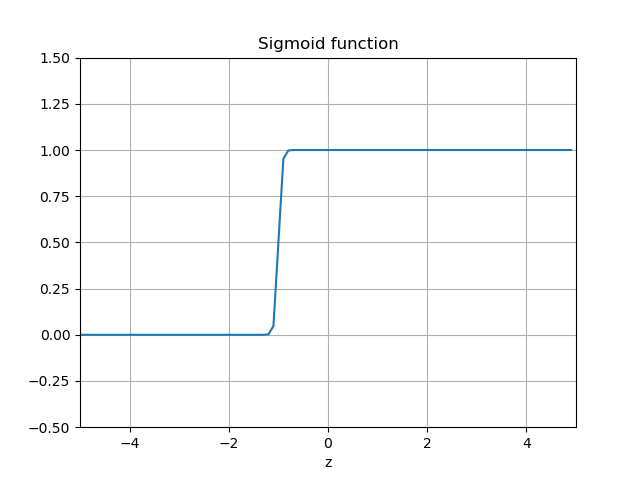

interactive(children=(FloatSlider(value=1.0, description='w', max=30.0, min=1.0, step=1.0), FloatSlider(value=…

In [29]:
# Plotting the output of a hidden neuron 
z = np.arange(-5, 5, .1)
sigma_fn = np.vectorize(hidden_n)
sigma = sigma_fn(z,1,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(z, sigma)
ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Sigmoid function')

def update(w = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(z,w,b))
    fig.canvas.draw_idle()

    

slow = interactive(update,w=FloatSlider(min=1, max=30, step=1), b =FloatSlider(min=1, max=30, step=1));
fig.show()
slow

# Introducing the sigmoid activation function:

# Using more than one sigmoid.  
Lets define what the output of a hidden layer would look like. 

In [33]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def hidden_n(x,w,b):
    y = w*x+b
    return sigmoid(y)

def two_layer(x, weight1, bias1, weight2, bias2, weight1_1, weight1_2):
    neuron1 = hidden_n(x,weight1, bias1)
    neuron2 = hidden_n(x,weight2, bias2)
    one = weight1_1*neuron1
    two = weight1_2*neuron2
    return one + two

<IPython.core.display.Javascript object>


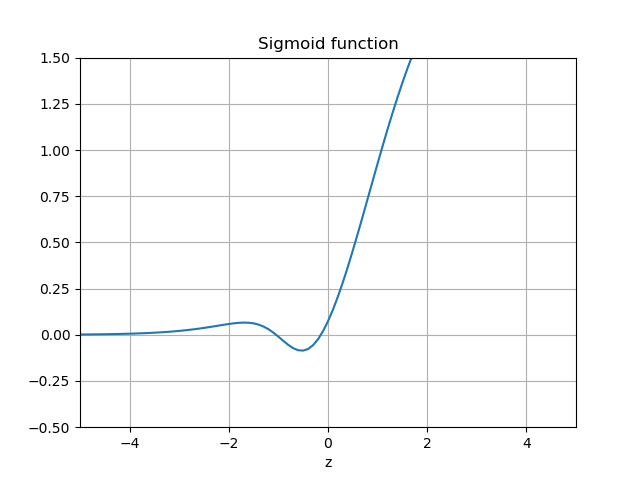

interactive(children=(FloatSlider(value=1.0, description='w1', max=3.0, min=-1.0), FloatSlider(value=1.0, desc…

In [39]:
%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
import numpy as np

# Plotting the output of a hidden neuron 
z = np.arange(-5, 5, .1)
sigma_fn = np.vectorize(two_layer)
sigma = sigma_fn(z,1,1,1,1,1,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(z, sigma)
ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('2 Neuron Sigmoid function')

def update(w1 = 1.0,w2=1.0, b1 =1.0, b2=1.0, w11=1.0, w12=1.0):
    line.set_ydata(sigma_fn(z, w1,b1, w2, b2, w11, w12))
    fig.canvas.draw_idle()

interact(update);
fig.show()

# Here we see we have managed to build a bump.
If we kept building these bumps on top of each other, we can see how just like in harmonics we can build any function. 

In [20]:
def two_layer_postsigmoid(x, weight1, bias1, weight2, bias2, weight1_1, weight1_2):
    neuron1 = hidden_n(x,weight1, bias1)
    neuron2 = hidden_n(x,weight2, bias2)
    one = weight1_1*neuron1
    two = weight1_2*neuron2
    return sigmoid(one + two)

<IPython.core.display.Javascript object>


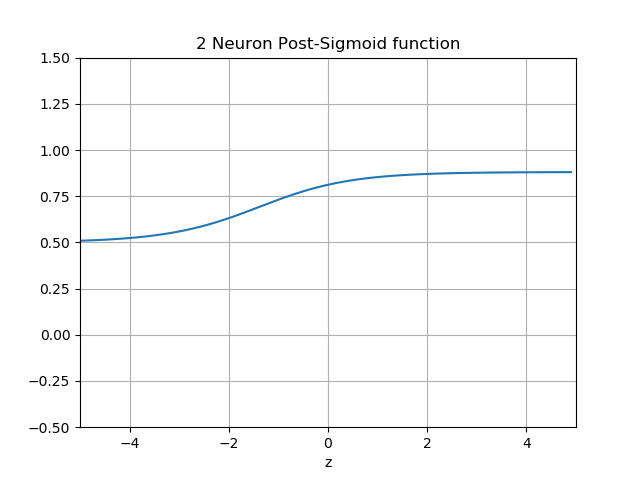

interactive(children=(FloatSlider(value=1.0, description='w1', max=3.0, min=-1.0), FloatSlider(value=1.0, desc…

In [24]:
# Plotting the output of a hidden neuron 
z = np.arange(-5, 5, .1)
sigma_fn = np.vectorize(two_layer_postsigmoid)
sigma = sigma_fn(z,1,1,1,1,1,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(z, sigma)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('2 Neuron Post-Sigmoid function')

def update(w1 = 1.0,w2=1.0, b1 =1.0, b2=1.0, w11=1.0, w12=1.0):
    line.set_ydata(sigma_fn(z, w1,b1, w2, b2, w11, w12))
    fig.canvas.draw_idle()

interact(update);
fig.show()

# Can we use this to solve XOR?

<IPython.core.display.Javascript object>


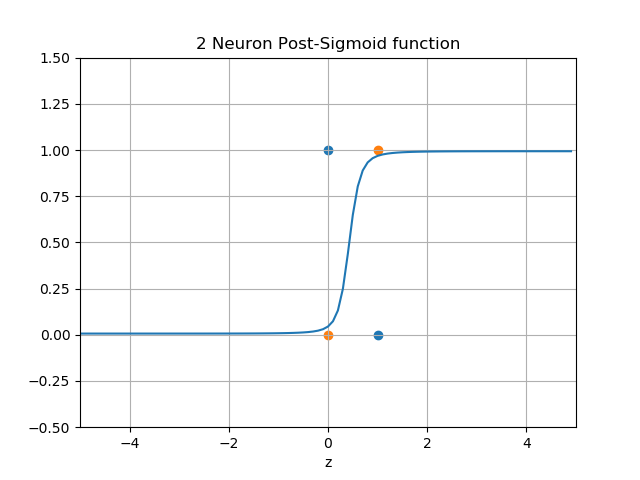

interactive(children=(FloatSlider(value=1.0, description='w1', max=5.0, min=-5.0, step=0.5), FloatSlider(value…

In [26]:
# Plotting the output of a hidden neuron 
z = np.arange(-5, 5, .1)
sigma_fn = np.vectorize(two_layer_postsigmoid)
sigma = sigma_fn(z,1,1,1,1,1,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(z, sigma)

# Plotting XOR
# Our inputs we want to give 1 (blue)
positive = np.array([
    [0,1],
    [1,0],
])
a, b = positive.T
plt.scatter(a,b)

# Our inputs which we want to give 0 (red)
negative = np.array([
    [0,0],
    [1,1]
])
a, b= negative.T
plt.scatter(a,b)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('2 Neuron Post-Sigmoid function')

def update(w1 = 1.0,w2=1.0, b1 =1.0, b2=1.0, w11=1.0, w12=1.0):
    line.set_ydata(sigma_fn(z, w1,b1, w2, b2, w11, w12))
    fig.canvas.draw_idle()

interact(update, 
         w1 = (-5,5,0.5),
         w2 = (-5,5,0.5), 
         b1 = (-5,5,0.5),
         b2 = (-5,5,0.5),
         w11 =(-5,5,0.5),
         w12 =(-5,5,0.5))
fig.show()

# Just for fun, lets try with 3 neurons:


# Solving XOR